In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

In [86]:
tracks = pd.read_csv('./data/spotify_data1m.csv')
tracks.drop(columns= "Unnamed: 0" , inplace = True)
tracks

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.5150,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.1450,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.5080,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.2170,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159759,Nicola Conte,Black Spirits,0m27F0IGHLGAWhqd6ccYst,4,2011,trip-hop,0.373,0.742,10,-6.453,0,0.0736,0.3250,0.000141,0.1590,0.5220,107.951,344013,3
1159760,Nicola Conte,Quiet Dawn,6er9p611eHEcUCU50j7D57,3,2011,trip-hop,0.516,0.675,7,-7.588,0,0.0326,0.7880,0.000129,0.1300,0.2640,119.897,285067,4
1159761,Amon Tobin,Morning Ms Candis,7jsMMqxy1tt0rH5FzYcZTQ,2,2011,trip-hop,0.491,0.440,5,-8.512,1,0.0274,0.4770,0.003130,0.0936,0.0351,100.076,214253,4
1159762,Peace Orchestra,Happy Christmas (War Is Over),77lA1InUaXztuRk2vOzD1S,0,2011,trip-hop,0.480,0.405,0,-13.343,1,0.0276,0.4310,0.000063,0.1250,0.2020,133.885,239133,3


In [87]:
tracks.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [88]:
tdf = tracks.groupby('year').agg({"instrumentalness" : np.mean , "duration_ms" : np.mean})
tdf.head()

/var/folders/5f/scjcfk_97_n7zmjltnpm2mjc0000gn/T/ipykernel_52609/2150644044.py:1: FutureWarning: The provided callable <function mean at 0x11ddf5da0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  tdf = tracks.groupby('year').agg({"instrumentalness" : np.mean , "duration_ms" : np.mean})


,instrumentalness,duration_ms
year,,
2000,0.239420,259887.548190
2001,0.245478,261913.330665
2002,0.243533,263335.524369
2003,0.240454,258998.805183
2004,0.228983,258381.273727


<Axes: xlabel='year', ylabel='duration_ms'>

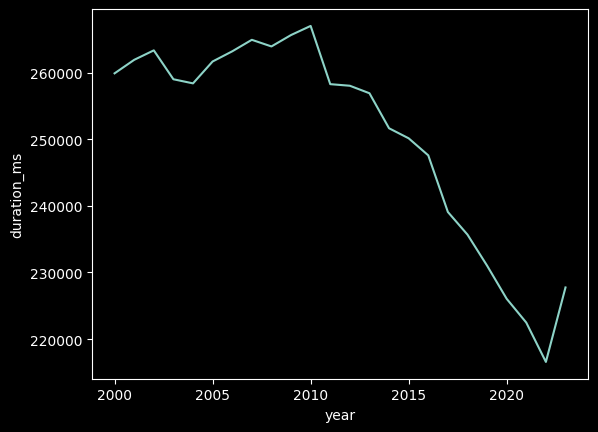

In [89]:
sns.lineplot(tdf , x = 'year' , y = 'duration_ms')

In [90]:
gcounts = tracks.groupby('year')['genre'].value_counts().rename('count').reset_index()
gcounts.head(20)

,year,genre,count
0,2000,ambient,1010
1,2000,gospel,947
2,2000,new-age,940
3,2000,sertanejo,928
4,2000,k-pop,927
5,2000,french,918
6,2000,forro,908
7,2000,alt-rock,896
8,2000,samba,883
9,2000,black-metal,874


In [91]:
# top10genres
top10genres = tracks['genre'].value_counts().sort_values(ascending=False).index[:8]
top10genres

Index(['black-metal', 'gospel', 'ambient', 'acoustic', 'alt-rock', 'emo',
       'indian', 'k-pop'],
      dtype='object', name='genre')

In [92]:
tdf = tracks[tracks['genre'].isin(top10genres)]
tdf

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144177,Rania,Masquerade,1lwJqsTF0c8bN4gbxATEA8,12,2011,k-pop,0.738,0.666,6,-5.684,0,0.0686,0.0642,0.000000,0.1310,0.480,128.979,193802,4
1144178,Jaliba Kuyateh,Habibu Giteh,2W4rs5wqpy81rfKlFuQlDZ,20,2011,k-pop,0.548,0.782,6,-7.992,1,0.0621,0.5890,0.076700,0.2170,0.811,124.652,214640,3
1144179,Jaliba Kuyateh,Pareh,0mefYhixVClHlPAbKpTqHo,21,2011,k-pop,0.711,0.552,10,-7.921,0,0.0380,0.7000,0.000848,0.0588,0.846,81.800,349413,4
1144180,Dave Stewart,Cheaper Than Free (feat. Stevie Nicks),2r7atiMkmzUmIMiAdAD27K,10,2011,k-pop,0.455,0.468,9,-6.443,1,0.0288,0.4760,0.000604,0.1060,0.168,81.448,220293,4


In [93]:
gt10 = tdf.groupby('genre')['year'].value_counts().reset_index().sort_values(by = ['genre' , 'year'])
gt10

,genre,year,count
18,acoustic,2000,841
23,acoustic,2001,673
20,acoustic,2002,826
12,acoustic,2003,869
17,acoustic,2004,846
...,...,...,...
169,k-pop,2019,888
183,k-pop,2020,820
170,k-pop,2021,873
180,k-pop,2022,822


<Axes: xlabel='year', ylabel='count'>

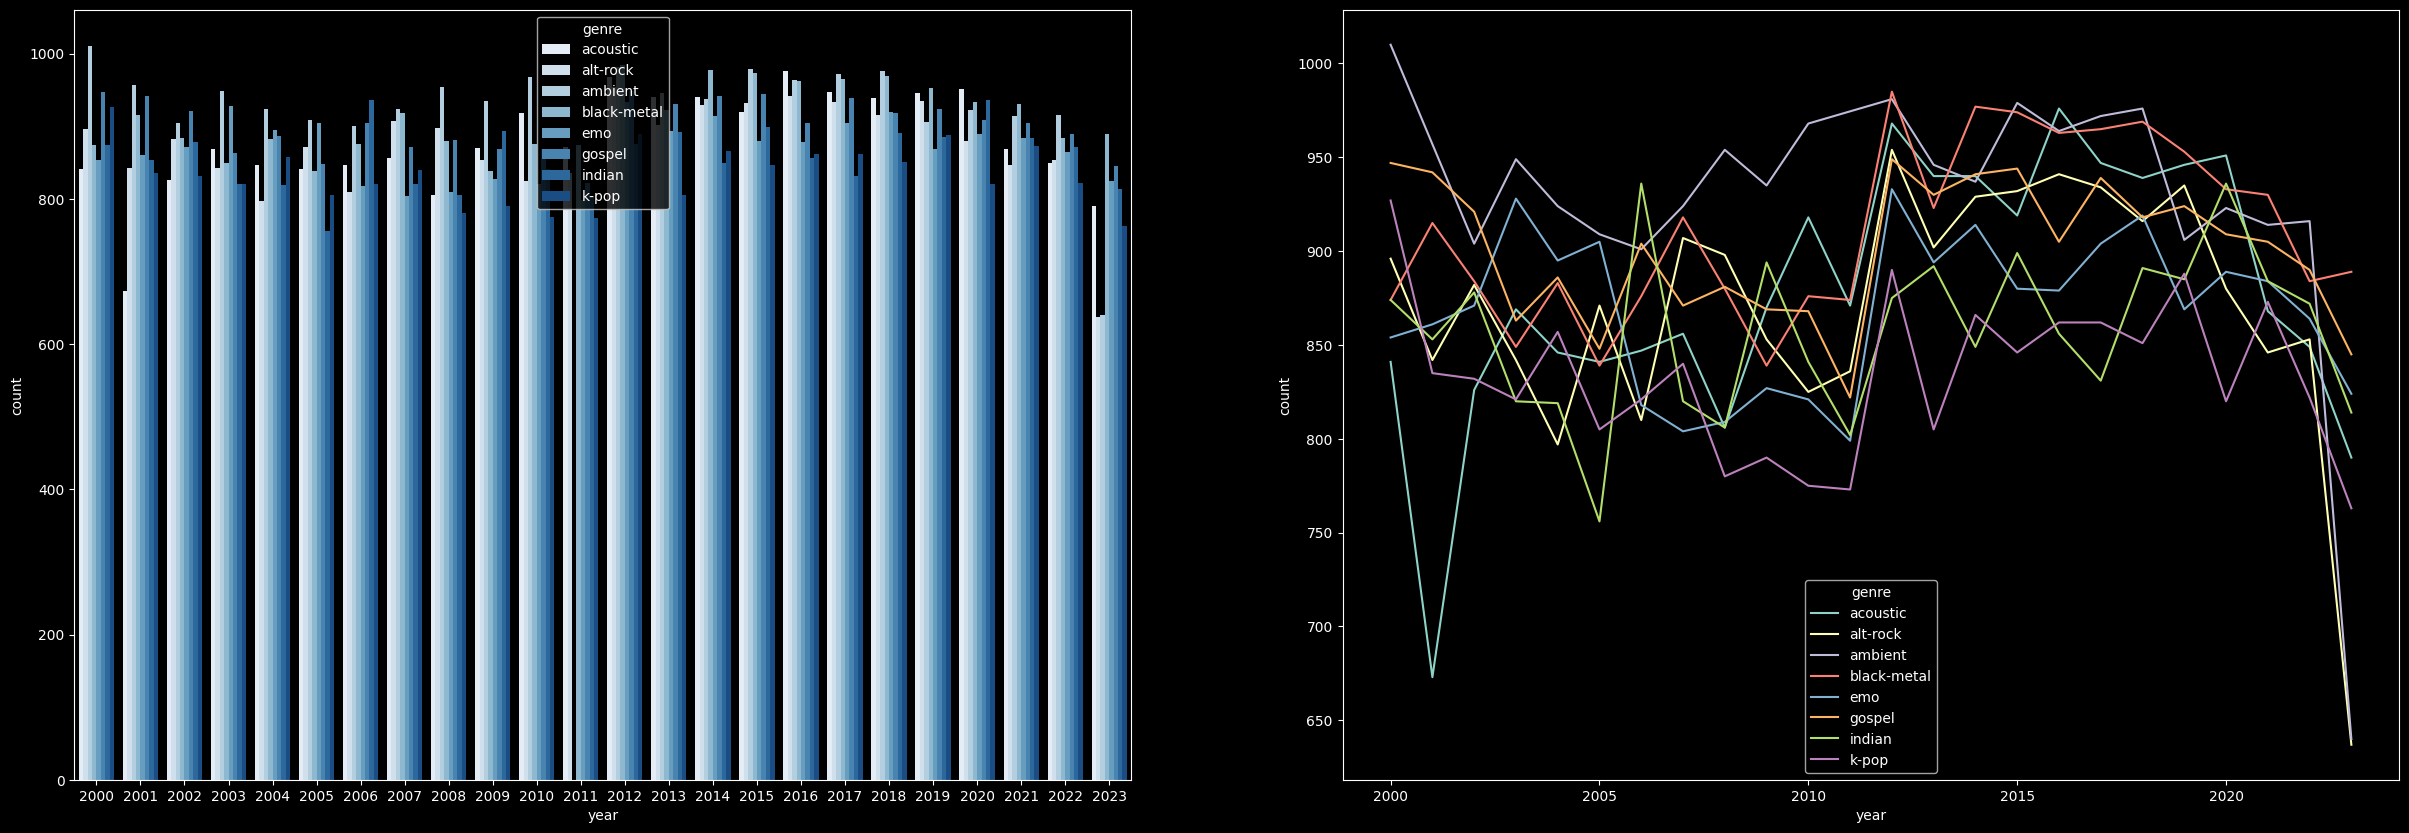

In [99]:
plt.figure(figsize = (30 , 10))
plt.subplot(1 ,2 , 1)
sns.barplot(gt10 , x = 'year' , y = 'count' , hue = 'genre' , palette = 'Blues' )
plt.subplot(1 ,2 ,2)
sns.lineplot(gt10 , x = 'year' , y = 'count' , hue = 'genre')